44.	Создайте функцию, выводящую всех однофамильцев определенного студента. Выведите девушек и юношей с аналогичной фамилией, а также их группу.

In [ ]:
CREATE OR REPLACE FUNCTION get_students_with_same_surname(
    p_student_id INTEGER
)
RETURNS TABLE (
	student_id INTEGER,
    last_name CHARACTER VARYING,
    first_name CHARACTER VARYING,
    group_name CHARACTER VARYING
) AS $$
DECLARE
    v_last_name CHARACTER VARYING;
BEGIN
    -- Получаем фамилию заданного студента и сохраняем в переменную
    SELECT s.last_name INTO v_last_name
    FROM public.students s
    WHERE s.student_id = p_student_id;

    -- Возвращаем таблицу с однофамильцами
    RETURN QUERY
    SELECT 
		s.student_id,
        s.last_name,
		s.first_name,
		s.students_group_number
    FROM public.students s
    WHERE s.last_name = v_last_name
    AND s.student_id != p_student_id;
END;
$$ LANGUAGE plpgsql;

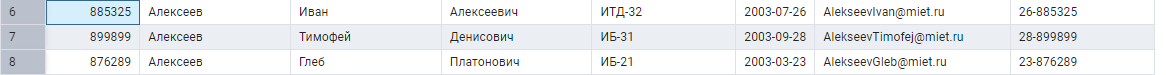

In [ ]:
SELECT * FROM get_students_with_same_surname(885325);

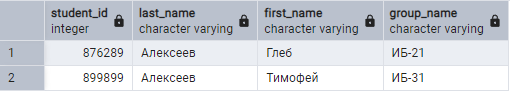
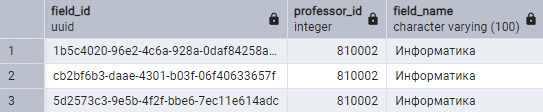